# Introducción a Redes Complejas en Biología de Sistemas


#  Trabajo Computacional 1 




## Ejercicio 1
## Características de las redes

Considere las tres redes de interacción de proteínas relevadas para levadura disponibles en la página de la
materia. Se trata de: una red de interacciones binarias(yeast_Y2H.txt), de copertenencia a complejos proteicos(yeast_AP-MS.txt) 
y obtenida de literatura (yeast_LIT.txt) obtenidas del Yeast Interactome Database.

1. a) Presente una comparación gráfica de las 3 redes.

En primer lugar importamos todas las funciones que utilizaremos durante todo el ejercicio. Cargamos la información de las redes y con ellos armamos tres grafos que llamamos G1(AP-MS), G2(LIT) y G3(Y2H).
A continuación se muestran los tres grafos. 

In [1]:
from lectura import ldata
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from  collections  import defaultdict
from scipy import optimize
import os

In [2]:
# Red de interacciones binarias(yeast_Y2H.txt)
# Red de copertenecia o complejos proteícos(yeast_AP-MS.txt)
# Red obtenida de literatura: Yeast Interactome Database(yeast_LIT.txt)

In [3]:
# El directorio que vamos a usar en cada lectura de datos de ahora en mas
directorio = os.path.dirname(os.path.realpath("yeast_AP-MS.txt"))

In [4]:
fnMS = os.path.join(directorio,'tc01_data/yeast_AP-MS.txt')
fnLIT = os.path.join(directorio,'tc01_data/yeast_LIT.txt')
fnY2H = os.path.join(directorio,'tc01_data/yeast_Y2H.txt')

# Lectura de datos
datosapms=ldata(fnMS)
datoslit=ldata(fnLIT)
datosy2h=ldata(fnY2H)

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


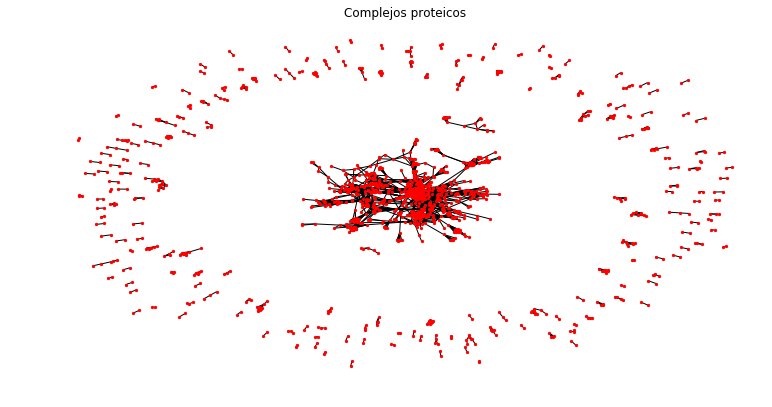

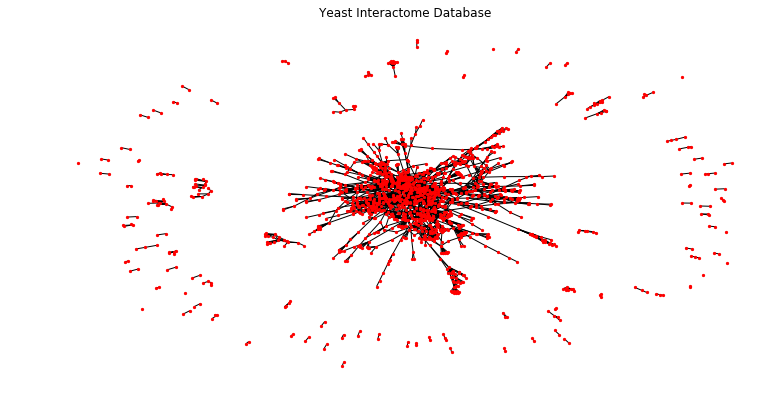

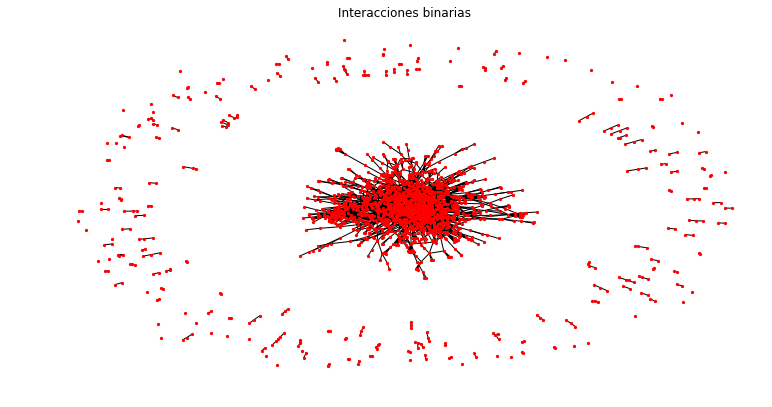

In [5]:
# Se crea una instancia de red
G1 = nx.Graph()
G2 = nx.Graph()
G3 = nx.Graph()

G1.add_edges_from(datosapms)
G2.add_edges_from(datoslit)
G3.add_edges_from(datosy2h)

# Gráfico de cada red
plt.figure(figsize=(10,5))
nx.draw(G1, with_labels=False, node_size=5)
plt.title("Complejos proteicos")
plt.show()

plt.figure(figsize=(10,5))
nx.draw(G2, with_labels=False, node_size=5)
plt.title("Yeast Interactome Database")
plt.show()

plt.figure(figsize=(10,5))
nx.draw(G3, with_labels=False, node_size=5)
plt.title("Interacciones binarias")
plt.show()

Además de la vizualización de las tres redes construimos un gráfico que contiene el histograma de grados y 
la cantidad de enlaces de las tres redes. En el mismo se puede apreciar con más claridad la diferencia en el 
número de enlaces entre las red de complejos proteicos(apms) y la de interacciones binarias(y2h). Esta diferencia no era muy visible en el grafo debido a que la red y2h tiene mayor cantidad de nodos en la componente central que 
a simple vista parecían muy conectados entre sí, sin embargo, la red apms a pesar de tener menor cantidad de
nodos están más conectados entre ellos.

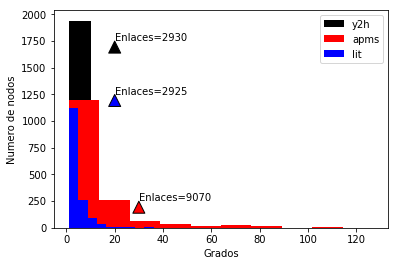

In [7]:
# Comparación gráfica de las tres redes

plt.hist(list(dict(G3.degree).values()),color="black",label="y2h")
plt.annotate("Enlaces="+str(G3.number_of_edges())+"", xy= (20,1750),xytext=(20, 1750),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.hist(list(dict(G1.degree).values()),color="r",label="apms")
plt.annotate("Enlaces="+str(G1.number_of_edges())+"", xy= (30,250),xytext=(30, 250),
            arrowprops=dict(facecolor='red', shrink=0.05),
            ) 
plt.hist(list(dict(G2.degree).values()),color="blue",label="lit")
plt.annotate("Enlaces="+str(G2.number_of_edges())+"", xy= (20,1250),xytext=(20, 1250),
            arrowprops=dict(facecolor='blue', shrink=0.05),
            )

            

plt.xlabel("Grados")
plt.ylabel("Numero de nodos")

plt.legend()
plt.show()

1. b) Resuma en una tabla las siguientes características de dichas redes

i.El número total de nodos, N

ii.El número total de enlaces L, de la red

iii. Si se trata de una red dirigida o no dirigida

iv. El grado medio, el grado máximo y mínimo de la red

v.La densidad de la red

vi.Los coeficientes de clustering <Ci> y CΔ de la red

vii. Diámetro de la red. 

Construimos 7 listas cada una de longitud 3 que contienen la información requerida para los tres grafos distintos. Para eso utilizamos las atribuciones de los grafos number_if_nodes, number_of_edges, degree, density, transitivity, average_clustering y connected_component_subgrphs.
Con toda la información recabada construimos la tabla que mostramos más adelante.

In [8]:
# Características de las redes

# Numero total de nodos
N = [G1.number_of_nodes(),G2.number_of_nodes(),G3.number_of_nodes()]

# Numero total de enlaces
L = [G1.number_of_edges(),G2.number_of_edges(),G3.number_of_edges()]

dirigido = ["no","no","no"]

# Grado medio
kmean = [np.mean(list(dict(G1.degree).values())),np.mean(list(dict(G2.degree).values())),
         np.mean(list(dict(G3.degree).values()))]

# Grado mínimo
kmin = [np.min(list(dict(G1.degree).values())),np.min(list(dict(G2.degree).values())),
         np.min(list(dict(G3.degree).values()))]

# Grado máximo
kmax = [np.max(list(dict(G1.degree).values())),np.max(list(dict(G2.degree).values())),
         np.max(list(dict(G3.degree).values()))]

# Densidad
densidad = [nx.density(G1),nx.density(G2),nx.density(G3)]

# Coeficiente de clustering global
clusteringglobal = [nx.transitivity(G1),nx.transitivity(G2),nx.transitivity(G3)]

# Coeficiente de clustering local
clusteringlocal = [nx.average_clustering(G1),nx.average_clustering(G2),nx.average_clustering(G3)]

# Diámetro 
diametro = [nx.diameter(max(nx.connected_component_subgraphs(G1), key=len)),
            nx.diameter(max(nx.connected_component_subgraphs(G2), key=len)),
            nx.diameter(max(nx.connected_component_subgraphs(G3), key=len))]

In [9]:
# Tabla con las caraterísticas de las redes
info= pd.DataFrame({"ID":['apms','YID_lit','y2h'],"nodos":N,"enlaces":L,"dirigido":dirigido,"kmean":kmean,
                    "kmin":kmin,"kmax":kmax,"densidad":densidad,"clusteringglobal":clusteringglobal,
                    "clusteringlocal":clusteringlocal,"diametro":diametro})

In [10]:
info

,ID,clusteringglobal,clusteringlocal,densidad,diametro,dirigido,enlaces,kmax,kmean,kmin,nodos
0,apms,0.618590,0.554636,0.006899,15,no,9070,127,11.183724,1,1622
1,YID_lit,0.346193,0.292492,0.002481,19,no,2925,40,3.808594,1,1536
2,y2h,0.023614,0.046194,0.001440,14,no,2930,91,2.903865,1,2018


## Ejercicio 2
## Homofilia
Considere la red social de 62 delfines de Nueva Zelanda (dolphins.txt).

Primeramente cargamos la red de delfines y el archivo que contiene el género de los mismos. Visualizamos la red con un grafo simple utilizando nx.draw(delfines) que no usa etiquetas ni de nodos ni de enlaces. Pero además probamos otros modos de visualización que incluyen etiquetados, posiciones de nodos y títulos (nx.draw_networkx). 
Como opciones de layout para estos gráficos experimentamos con nx.random_layout el cual posiciona los nodos uniformemente al azar y nx.circular_layout que posiciona los nodos en forma de círculo. Para ambos casos ordenamos los nodos de menor a mayor en base al grado y le asignamos color rojo degradado, dónde los nodos de menor grado presentan un color más claro. Nos resultó muy informativo el layout en forma de círculo porque se puede distinguir claramente la densidad de enlaces por nodo aun cuando no le hayamos ordenado por color. 

Luego le incrorporamos a cada nodo de la red la clase "género" y asociamos el género a cada delfín.


In [11]:
fnDOL = os.path.join(directorio,'tc01_data/dolphins.gml')
delfines = nx.read_gml(fnDOL)

# Información sobre el género de los delfines
generos=ldata('tc01_data/dolphinsGender.txt')

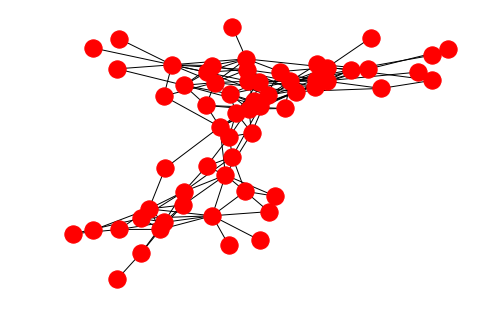

In [12]:
nx.draw(delfines)
plt.show()

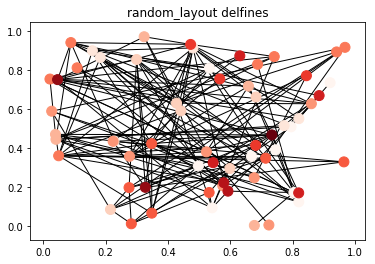

In [13]:
nx.draw_networkx(delfines,nx.random_layout(delfines),with_labels=False,node_size=100,
                 node_color = sorted(list(dict(delfines.degree()).values())),cmap=plt.cm.Reds)
plt.title("random_layout delfines")
plt.show()

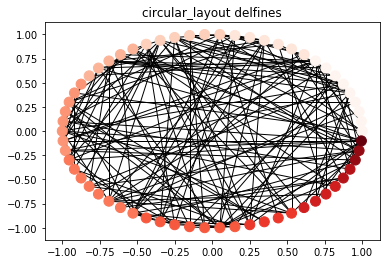

In [14]:
nx.draw_networkx(delfines,nx.circular_layout(delfines),with_labels=False,node_size=100,
                 node_color = sorted(list(dict(delfines.degree()).values())),cmap=plt.cm.Reds)
plt.title("circular_layout delfines")
plt.show()

In [15]:
# Asignación de la clase genero a cada nodo de la red
for delfin in generos:    
    delfines.node[delfin[0]]["genero"]=delfin[1]    

a. Examine diferentes opciones de layout para este grafo e identifique la que le resulte más
informativa. Justifique su elección detallando las características estructurales de la red
que su elección pone en evidencia. Incluya en la representación gráfica de la red
información sobre el sexo de los delfines.

Para poder visualizar correctamente el gráfico, tienendo en cuenta el género de los delfines, incorporamos un color rojo a todos los delfines femenimos, azul a los masculinos y gris a los que no tienen género asignado. Ploteamos el grafo en un tamaño determinado y utilizamos el layout fruchterman_reingold_layout porque consideramos que es el que mejor nos permite visualizar la distribución de los delfines, evitando cruce entre lineas. 

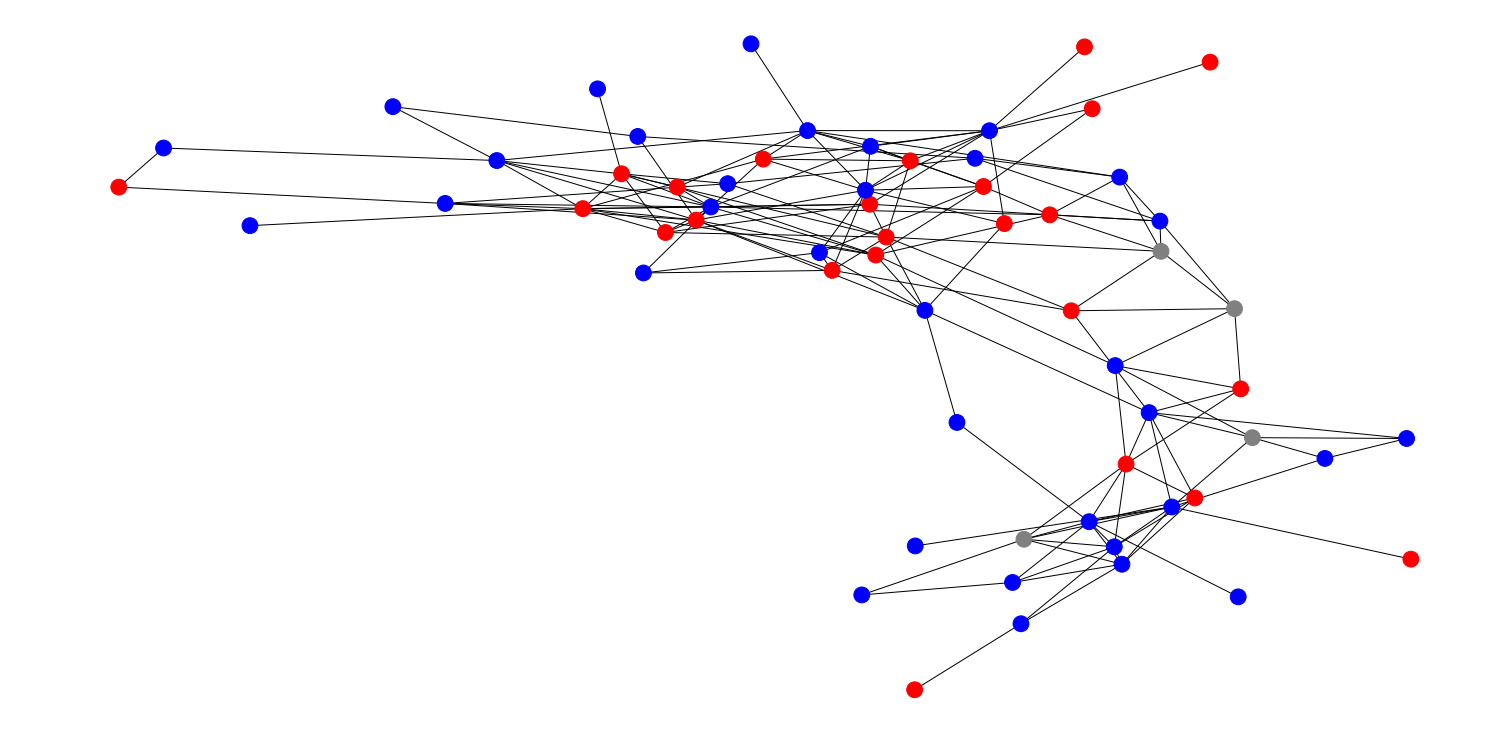

In [16]:
# Grafico con información de género de los delfines

plt.figure(figsize=(20,10))
nx.draw(delfines, 
        width=1, 
        node_color=["blue" if g=="m" else "red" if g=="f" else "grey"  for g in nx.get_node_attributes(delfines, 
                                                                                        "genero").values()], 
        node_size=250,
        with_labels=False,
       pos=nx.fruchterman_reingold_layout(delfines)
       )
plt.show()

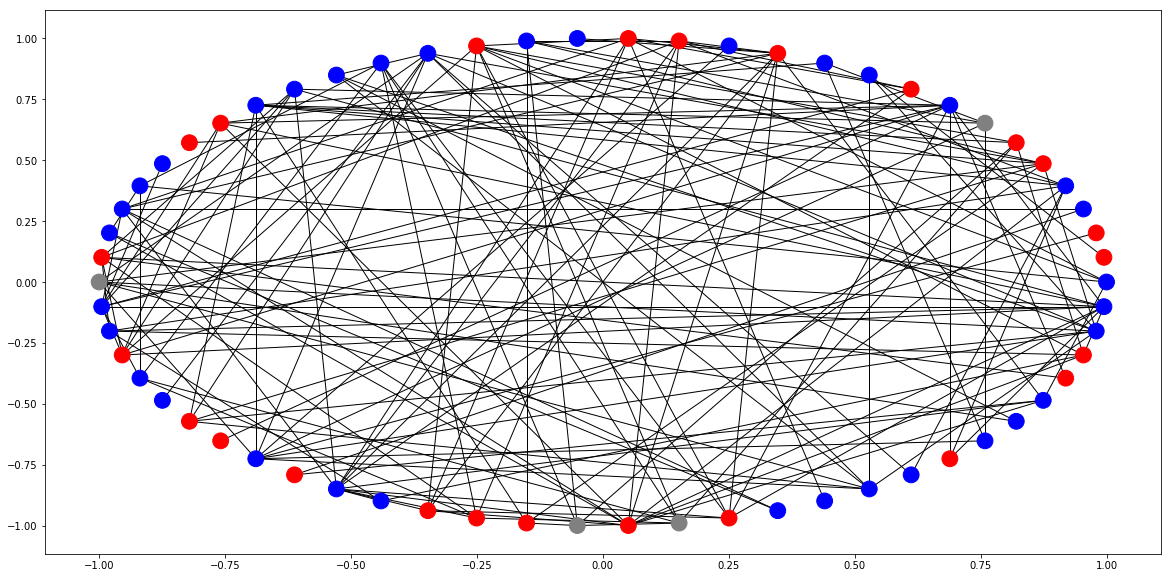

In [17]:
# Grafico con información de género de los delfines

plt.figure(figsize=(20,10))
nx.draw_networkx(delfines, 
        width=1, 
        node_color=["blue" if g=="m" else "red" if g=="f" else "grey"  for g in nx.get_node_attributes(delfines, 
                                                                                        "genero").values()], 
        node_size=250,
        with_labels=False,
       pos=nx.circular_layout(delfines)
       )
plt.show()

2 b) ¿Se trata una red donde prevalece la 
homofilia
en la variable género?
Para 
responder

i.
Considere  la
distribución  nula
para  la  fracción  de  enlaces  que  vinculan  géneros 
diferentes
,
generada a partir de 
al menos 
1000 asignaciones aleatorias de género. 

ii.
A partir de lo obtenido proponga una estimación para el valor y 
el error
de dicha 
cantidad
cuando no existe vínculo entre topolgía de la red 
medio 
y asignación de 
género. Compare
su estimación con el valor medio esperado.

iii.
Estime  la significancia estadística  (p
valor) del valor observado en 
el caso de 
la 
red real.

Hicimos una copia de delfines y para N=1000 realizaciones distintas, distribuímos el género original de los delfines de manera random (es decir, manteniendo las proporciones, pero asignándolos a otros delfines). 
Para cada una de las realizaciones se cuenta la cantidad de enlaces que unen dos delfines con sexos distintos (enlaces homofílicos). 

Luego calculamos la "cantidad cruzada" (el grado de homofilia) como la cantidad de enlaces homofílicos sobre la cantidad de enlaces totales. Observamos la distribución de ese valor graficando el histograma y calculando el promedio y la distribución estandard. 
Para verificar el grado de homofilia de la distribución dada, comparamos la cantidad cruzada del grafo dado, con la distribución obtenida luego de las 1000 realizaciones al azar.

In [18]:
sexos=dict(delfines.node.data("genero"))
test=delfines.copy()  # Si ponés igual se te modifica todo junto
N=1000
cantidadcruzada=[]

# N realizaciones aleatorias de genero  
for i in range(N):
    for delfin,genero in zip(test,np.random.permutation(list(sexos.values()))):
        
        # Asigna genero a delfines(nodos) de test a partir de la realizacion aleatoria       
        test.node[delfin]["genero"]=genero
       
    # Cuenta el # de enlaces de generos diferentes (clsases diferentes) para cada red aleatoria
    contador=0
    for enlaces in list(test.edges): 
        
            # Compara el genero de dos nodos enlazados    
            if test.node[enlaces[0]]["genero"]!=test.node[enlaces[1]]["genero"]:
                contador=contador+1
                
    cantidadcruzada.append(contador/test.number_of_edges())

cantidadcruzada.sort()
print(np.mean(cantidadcruzada)) # El promedio de los porcentajes de enlaces que son homofílicos 
                                # de la asignación aleatoria de géneros.
print(np.std(cantidadcruzada))  #La desviación estándar de lo mismo


# Cuenta el # de enlaces de generos diferentes (clsases diferentes) en la red original
contador=0
for enlaces in list(delfines.edges):
            if delfines.node[enlaces[0]]["genero"]!=delfines.node[enlaces[1]]["genero"]:
                contador=contador+1       
            
cruzadadelfines=contador/delfines.number_of_edges()  #el porcentaje de enlaces que son homofílicos
print(cruzadadelfines)


j=0
while cantidadcruzada[j]<cruzadadelfines:
    j=j+1
p_value = float(j)/N
print(p_value)


0.5524716981132076
0.04083032769868255
0.39622641509433965
0.001


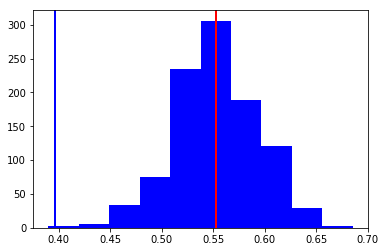

In [19]:
plt.hist(cantidadcruzada,color="b")
plt.axvline(np.array(cantidadcruzada).mean(), color='r',linewidth=2)
plt.axvline(cruzadadelfines, color='b',linewidth=2)

plt.show()

Por último se calculó el p-valor, que es menor que 0.001. Es decir, entre los 1000 casos de las realizaciones, no hay ninguna que tenga una proporción de la cantidad de enlaces cruzados menor que la original . De esta manera, se observó que la distribución es homofílica.

## Ejercicio 3
## Libre de escala

Considere la red as-22july06.gml creada por Mark Newman que contiene la estructura de los
sistemas autónomos de internet relevada a mediados de 2006.

a. Encuentre gráficamente la distribución de grado Pk como función de k explorando
diferentes alternativas: un bineado lineal o logarítmico, utilizando escalas logarítmicas o
lineales en uno o ambos ejes. Discuta que alternativa permite apreciar mejor el carácter
libre de escala de dicha distribución

En primer lugar cargamos la información, y la ordenamos en un diccionario que para cada grado posible de los nodos del grafo, devuelve la cantidad de nodos que tiene ese grado.


In [20]:
fn_int = os.path.join(directorio,'tc01_data/as-22july06.gml')
sistautinternet = nx.read_gml(fn_int)

In [21]:
# Librería para crear contables
from collections import defaultdict

grados = defaultdict(int)                   # valor inicial es int: 0
for i in (list(dict(sistautinternet.degree).values())): 
    grados[i]+=1                            # Para cada elemento de la lista el valor se incrementa en uno donde el grado es i
    gord = sorted(grados.items())     
    k, pk = np.array(gord).T                # Arma dos matrices con la misma dimension para el grafico.
                                            
    pk = [float(i) / sum(pk) for i in pk]   # Calculo de la probabilidad 

A continuación graficamos los grados posibles del nodo vs la cantidad de nodos con ese grado que hay en ese nodo. De esta manera el tamaño de las beans es 1 para todos los nodos (lineal). Se realizan dos variaciones distintas. La primera con escala logarítmica en ambos ejes y la segunda lineal en ambos.

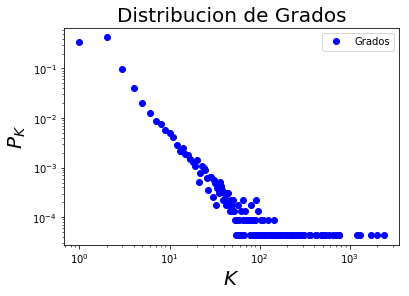

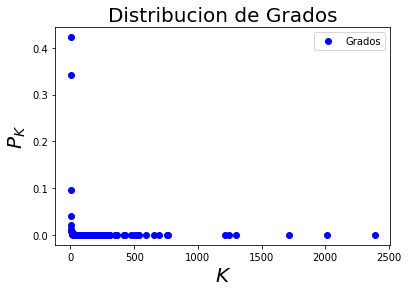

In [22]:
# Bineado lineal 

# Escala logartimica
plt.plot(k, pk, 'bo')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Grados'])
plt.xlabel('$K$', fontsize = 20)
plt.ylabel('$P_K$', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()
   
    
# Escala lineal    
plt.plot(k, pk, 'bo')
plt.legend(['Grados'])
plt.xlabel('$K$', fontsize = 20)
plt.ylabel('$P_K$', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()    

In [23]:
# Beneado Logaritmico para pk y k

# Para pk
grados = defaultdict(int)
j=1
while j<=(max((list(dict(sistautinternet.degree).values())))):
    for i in (list(dict(sistautinternet.degree).values())): 
        if i<=j and i>=j/2:
            grados[j]+=1        
    j=j*2        
gord = sorted(grados.items())    
k, pk = np.array(gord).T   
#print (pk,k)

pk = [i/float(j) for i,j in zip(pk,k)] #Aquí cambie a flotante porque me daba mal. Creo que por la version de python

# Para k
# Hace celdas equiespaciadas en escala logaritmica que dependen del grado
bins=[1]
s=1
j=1
for t in k[1:]:
    s=j+t/2  
    j=j+t
    bins.append(s)
print (bins,k)

[1, 2.0, 5.0, 11.0, 23.0, 47.0, 95.0, 191.0, 383.0, 767.0, 1535.0, 3071.0] [   1    2    4    8   16   32   64  128  256  512 1024 2048]


Para obtener un bineado logaritmico (en este caso lo haremos en base 2) realizamos el mismo procedimiento, pero en cada pasa sumamos todos los nodos que tengan entre 2*N y 2*(N+1). Graficamos el resultado utilizando como eje x los primeros puntos de cada bin. 

Se muestran los gráficos utilizando 4 alternativas: los dos ejes lineales, los dos logarítmicos o uno lineal y otro logarítmico. 

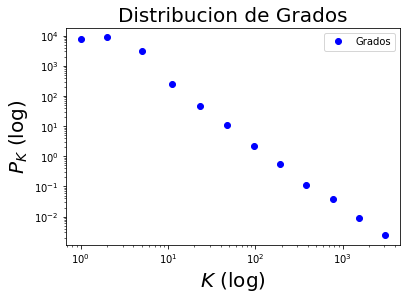

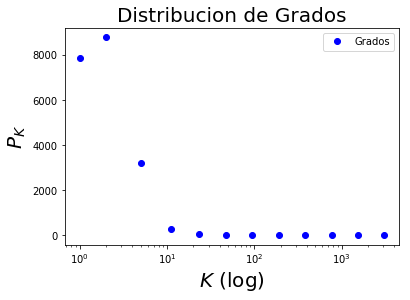

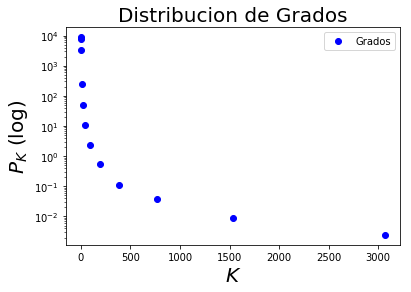

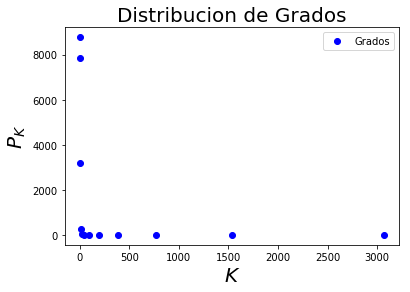

In [24]:
# Bineado logaritmico con escala lgaritmica en ambos ejes

plt.plot(bins, pk, 'bo')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Grados'])
#plt.loglog(bins,pk,'o',c="blue")
plt.xlabel('$K$ (log)', fontsize = 20)
plt.ylabel('$P_K$ (log)', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()
 
# Escala logaritmica en k 
plt.plot(bins, pk, 'bo')
plt.xscale('log')
plt.legend(['Grados'])
plt.xlabel('$K$ (log)', fontsize = 20)
plt.ylabel('$P_K$', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()

# Escala logaritmica en pk
plt.plot(bins, pk, 'bo')
plt.yscale('log')
plt.legend(['Grados'])
plt.xlabel('$K$', fontsize = 20)
plt.ylabel('$P_K$ (log)', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()
 
# Solo bineado    
plt.plot(bins, pk, 'bo')
plt.legend(['Grados'])
plt.xlabel('$K$', fontsize = 20)
plt.ylabel('$P_K$', fontsize = 20)
plt.title('Distribucion de Grados', fontsize = 20)
plt.show()


Observamos que el gráfico presentado con ambos ejes logarítmicos se ve lineal. Por lo tanto,
la relación sigue una ley de potencias. Al utilizar un bineado logarítmico los nodos de alto grado se grafican en conjunto utilizando el promedio, evitándo así debido a la poca cantidad de nodos de alto grado, que haya sólo uno o dos nodos en cada bin del sector del gráfico correspondiente a los nodos de alto grado.
Por último ajustamos el gráfico en escala logarítmica por una recta, y utilizamos la pendiente
de esa recta como exponente de la ley de potencias. Mostramos el gráfico con el ajuste a escala
logarítmica y lineal.

In [25]:
# Estimación del exponente minimizando la función de verosimilitud

# Toma logaritmo en base 10 de los datos de entrada
logx = np.log10(bins)
logy = np.log10(pk)

fitfunc = lambda p, x: p[0] + p[1] * x              # Curva de ajuste
errfunc = lambda p, x, y: (y - fitfunc(p, x))       # funcion de error

p0 = [5, -2.0]  # Estimación inicial a minimizar                   

out = optimize.leastsq(errfunc, p0,  args=(logx, logy), full_output=1) # Minimiza la suma de los cuadrados entre la
                                                                       # estimación inicial y el error
pfinal = out[0]

print(pfinal)
index = pfinal[1]
amp = 10.0**pfinal[0]       


[ 4.42018009 -2.0273688 ]


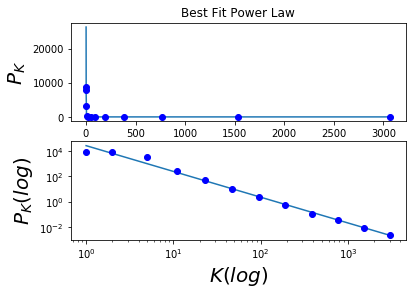

In [26]:
# Grafica del ajute asumiendo la siguiente hipotesis:
powerlaw = lambda x, amp, index: amp * (x**index)

#plt.clf()
plt.subplot(2, 1, 1)
plt.plot(bins, powerlaw(bins, amp, index))     # Fit
plt.plot(bins, pk, 'bo')                       # Data
plt.title('Best Fit Power Law')

plt.xlabel('$K$', fontsize = 20)
plt.ylabel('$P_K$', fontsize = 20)

plt.subplot(2, 1, 2)
plt.loglog(bins, powerlaw(bins, amp, index))
plt.loglog(bins, pk, 'bo')  # Data

plt.xlabel('$K(log)$', fontsize = 20)
plt.ylabel('$P_K(log)$', fontsize = 20)
plt.show()

## Ejercicio 4
## Asortatividad

Considere  la  red  de  colaboraciones  científicas  (
netscience.gml)  y  la  red  de  internet(as-july06.gml)
.
Analice
si nodos de alto grado tienden a conectarse con nodos de alto grado
o  por  el  contrario  suelen  conectarse  a  nodos  de  bajo  grado?  (i.e  la  red  es  asortativa  o 
disortativa respecto al grado?). Para ello:

i.
Determine, para nodos de grado 
k
,
cuánto vale en media
el grado de sus vecinos.
[hint R: 
se puede estimar primero el grado medio de los vecinos de cada nodo de 
la red y luego utilizar 
aggregate
sobre esos datos
, 
que
permite 
estimar cantidades 
sobre subconjuntos determinados de datos
de acuerdo a diferentes criterios
]



In [27]:
fn_sc = os.path.join(directorio,'tc01_data/netscience.gml')
fn_internet = os.path.join(directorio,'tc01_data/as-22july06.gml')

netscience = nx.read_gml(fn_sc)
redinternet = nx.read_gml(fn_internet)

Una forma cuantificar si la red es asortativa o disortativa es a través del análisis del grado medio de los vecinos de cada nodo. Esto es, fijarse en cada nodo, sumar y promediar los grados de sus primeros vecinos. 

Cargamos las dos redes como grafos. Recorriendo todos los nodos, calculamos el grado de cada nodo y el grado promedio de los nodos vecinos. Luego, calculamos para cada grado existente en el grafo, el promedio del promedio de los grados vecinos. Graficamos el promedio del promedio de los grados vecinos en función de los grados de los nodos. 

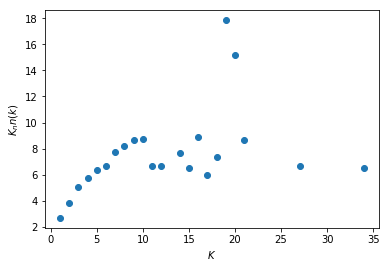

In [31]:
# i)
# Red de colaboraciones científicas

gradosporgrado=defaultdict(int)
for nod in list(netscience.node):
    vecinos=list(netscience.adj[nod])#los vecinos de nodo
    gradosveci=[]
    for vecino in vecinos:
        gradoveci=netscience.degree[vecino]
        gradosveci.append(gradoveci)
    gradonod=len(vecinos)  # cantidad de vecinos de nodo o grado del nodo
    if gradonod>0:
        promedionod=np.mean(gradosveci)
        if gradosporgrado[gradonod]==0:
            gradosporgrado[gradonod]=[]
            gradosporgrado[gradonod].append(promedionod)    
        else:        
            gradosporgrado[gradonod].append(promedionod)
for key in gradosporgrado.keys():
    gradosporgrado[key]=np.mean(gradosporgrado[key])
plt.scatter(list(gradosporgrado.keys()),list(gradosporgrado.values()))
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.show()

gradonodlista=gradosporgrado.keys()
gradopromediolista=gradosporgrado.values()

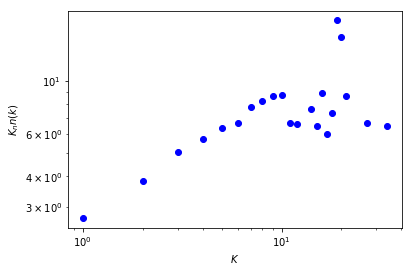

In [32]:
# Con escala logaritmica

plt.loglog( gradosporgrado.keys(),gradosporgrado.values(),'bo')
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.show()

ii. Analizar
la  tendencia  observada  en  un  gráfico  que  consigne 
dicho  valor knn(k) como 
función del grado.


Asumiendo que el gráfico obtenido sigue una ley de potencias calculamos la tendencia observada minimizando la suma 
de los cuadrados entre la curva de ajuste y la función de error. De este modo obtuvimos la tendencia de knn como 
función del grado.

Realizamos un gráfico loglog del promedio de los promedios de los grados de los vecinos en función del grado de los nodos
con su curva de ajuste.


0.5510623981097461 0.3061166507613612 3.55682418265606 0.3061166507613612


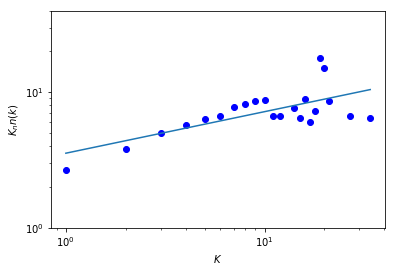

In [33]:
# ii)

# Análisis de la tendencia observada de la red ciencia

powerlaw = lambda x, amp, index: amp * (x**index)

grad = np.log10(list(gradonodlista))
gradpromvecinos = np.log10(list(gradopromediolista))


fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y: (y - fitfunc(p, x)) 

pinit = [5, -2.0]
out = optimize.leastsq(errfunc, pinit,  args=(grad, gradpromvecinos), full_output=1)
pfinal = out[0]


index = pfinal[1]
amp = 10.0**pfinal[0]

print(pfinal[0],pfinal[1],amp,index)

plt.clf()
plt.loglog(gradonodlista,gradopromediolista,'bo') 
plt.plot(gradonodlista, powerlaw(list(gradonodlista), amp, index))     # Fit
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.ylim(1,40)                      
plt.show()


iii) Asumiendo que knn(k = akμ, estime el exponente de correlación a partir de
realizar una regresión de log knn~logk. Asegurese de graficar el fiteo en el
grafico anterior. [hint R: lm permite hacer regresiones lineales]

En este caso se importó la librería scipy que permite hacer análisis estadísticos y asumiendo que 
nuestros datos pueden ser ajustados con una recta, aplicamos una regresión linea simple.                       

Estimamos el exponente de correlación de grados para el método de grado medio de vecinos haciendo un ajuste de
potencias y aplicando regresión lineal. La regresión lineal estima una pendiente de igual valor (0.306), resultado que era esperable. Además, dicho resultado nos está indicando que la red de colaboraciones se puede considerar
asortativa respecto del grado medio de sus vecinos. Al contrastar este resultado con la bibliografía se pudo
concluir que el resultado es el esperado para una red de colaboraciones con esta topología, al igual que suele ocurrir con las redes sociales. El hecho que subyace a esta conclusión es que los trabajos más citados se escriben entre sí.

Se procedió a desarrollar el mismo procedimiento de estimación para la red de internet.

Subítem i)

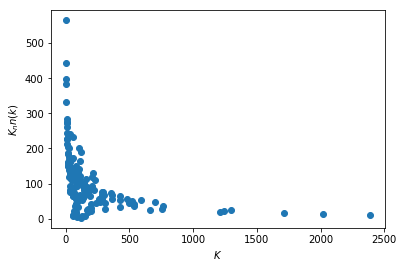

In [36]:
# Red de internet

gradosporgrado=defaultdict(int)
for nod in list(redinternet.node):
    vecinos=list(redinternet.adj[nod])#los vecinos de nodo
    gradosveci=[]
    for vecino in vecinos:
        gradoveci=redinternet.degree[vecino]
        gradosveci.append(gradoveci)
    gradonod=len(vecinos)  # cantidad de vecinos de nodo o grado del nodo
    if gradonod>0:
        promedionod=np.mean(gradosveci)
        if gradosporgrado[gradonod]==0:
            gradosporgrado[gradonod]=[]
            gradosporgrado[gradonod].append(promedionod)    
        else:        
            gradosporgrado[gradonod].append(promedionod)
for key in gradosporgrado.keys():
    gradosporgrado[key]=np.mean(gradosporgrado[key])
                                

plt.scatter(list(gradosporgrado.keys()),list(gradosporgrado.values()))
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.show()
                                
gradonodlista_int=gradosporgrado.keys()
gradopromediolista_int=gradosporgrado.values() 

Subítem ii)

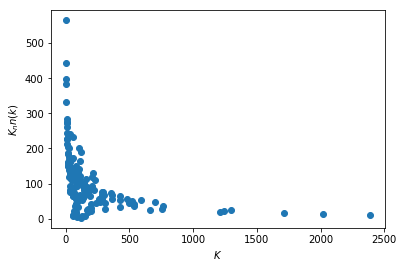

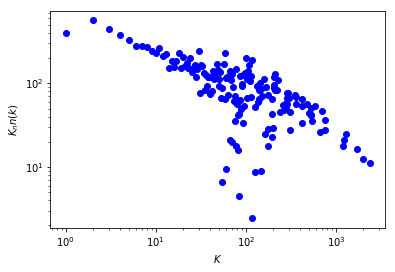

In [39]:
plt.scatter(list(gradosporgrado.keys()),list(gradosporgrado.values()))
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.show()

plt.loglog( gradosporgrado.keys(),gradosporgrado.values(),'bo')
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.show()

Subítem iii)

[ 2.74805261 -0.44417355]


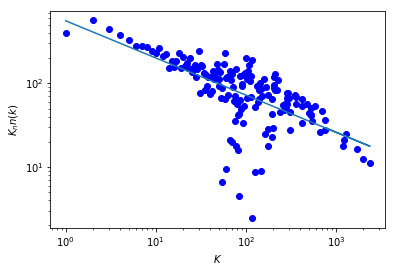

In [40]:
# Análisis de la tendencia observada para la red de internet
# iii)

powerlaw = lambda x, amp, index: amp * (x**index)

grad_int = np.log10(list(gradonodlista_int))
gradpromvecinos_int = np.log10(list(gradopromediolista_int))


fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y: (y - fitfunc(p, x)) 

pinit = [5, -2.0]
out_int = optimize.leastsq(errfunc, pinit,  args=(grad_int, gradpromvecinos_int), full_output=1)
pfinal_int = out_int[0]

print(pfinal_int)
index_int = pfinal_int[1]
amp_int = 10.0**pfinal_int[0]

plt.clf()
plt.loglog(gradonodlista_int,gradopromediolista_int,'bo') 
plt.plot(gradonodlista_int, powerlaw(list(gradonodlista_int), amp_int, index_int))     # Fit
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
#plt.ylim(1,40)                      
plt.show()

Para esta red el exponente estimado fue de signo negativo (-0.444) indicando que la red es 
disortativa respecto del grado. 

Otra medida de asortatividad que se establece entre grados de un enlace es el coeficiente de correlación propuesto
por Newman. En este caso lo determinamos sumando todos los distintos grados conectados por un enlace. El método se 
aplicó igualmente para ambas redes. 

En el caso de la red de colaboraciones el coeficiente fue de 0.461, muy similar al exponente estimado en el 
análisis por regresión pero con una ligera diferencia. Esta diferencia se debe a que el coeficiente de Newman asume una relación lineal, mientras que el análisis por regresión asume una relación potencial.

En general, la distribución en redes reales suele tomar una distribución potencial, lo cual implica que un ajuste a una función potencial suele ser más sensible y más lejana a la distribución homogénea que una regresión lineal, como la de Newman.


In [42]:
# Funcion que sumará las listas de grados
def sumarLista(lista):
    suma=0
    for i in range(0,len(lista)):
        suma=suma+lista[i]
    return suma 

In [48]:
# Coeficiente de correlación usando el estimador propuesto por NEWMAN 
# Para la red de colaboraciones
# iv)

def CoefNewman(red):

    sumse = []
    sums1 = []
    sums2 = []
    sums3 = []
    listnodos = []

# Ciclo que recorre todos los enlaces de la red
    for enlace in list(red.edges):    
        se = red.degree(enlace[0])*red.degree(enlace[1]) # multiplica grados de nodos en enlace
        sumse.append(se)    
    
        for node in list(enlace):                                       
            if node not in listnodos:  # se fija si el nodo está en la lista de nodos                                  
            
                listnodos.append(node)
                s1 = red.degree(node)
                sums1.append(s1)
                s2 = red.degree(node)**2
                sums2.append(s2)
                s3 = red.degree(node)**3
                sums3.append(s3)        
            
        
#sumse = 2*sumse 


    sumnumerador = (sumarLista(sums1)*(2*sumarLista(sumse)))-(sumarLista(sums2)**2) 
    sumdenominador = (sumarLista(sums1)*sumarLista(sums3))-(sumarLista(sums2)**2)

    coef = float(sumnumerador)/float(sumdenominador)   
    print(str(red))
    print ("Coeficiente de Newman: ",coef)
    print ("nodos: ", len(listnodos),"aristas: ",len(red.edges()))
    

In [49]:
CoefNewman(netscience)
CoefNewman(redinternet)


Coeficiente de Newman:  0.4616224667525835
nodos:  1461 aristas:  2742

Coeficiente de Newman:  -0.19838487512056477
nodos:  22963 aristas:  48436


Por último, realizamos el mimso análisis para las redes de interacción de proteínas de las levaduras. En particular, las redes denominadas y2h y apms.

In [50]:
apms=ldata('tc01_data/yeast_AP-MS.txt')
y2h=ldata('tc01_data/yeast_Y2H.txt')

graph_apms = nx.Graph()
graph_y2h = nx.Graph()

graph_apms.add_edges_from(apms)
graph_y2h.add_edges_from(y2h)

A continuación realizamos el análisis completo para la red y2h

In [51]:
# Ejercicio 4bi

gradosporgrado=defaultdict(int)
for nod in list(graph_y2h.node):
    vecinos=list(graph_y2h.adj[nod])#los vecinos de nodo
    gradosveci=[]
    for vecino in vecinos:
        gradoveci=graph_y2h.degree[vecino]
        gradosveci.append(gradoveci)
    gradonod=len(vecinos)  # cantidad de vecinos de nodo o grado del nodo
    if gradonod>0:
        promedionod=np.mean(gradosveci)
        if gradosporgrado[gradonod]==0:
            gradosporgrado[gradonod]=[]
            gradosporgrado[gradonod].append(promedionod)    
        else:        
            gradosporgrado[gradonod].append(promedionod)
for key in gradosporgrado.keys():
    gradosporgrado[key]=np.mean(gradosporgrado[key])

gradonodlista_y2h=gradosporgrado.keys()
gradopromediolista_y2h=gradosporgrado.values()

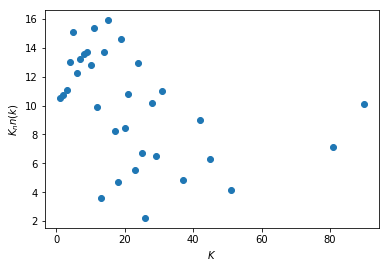

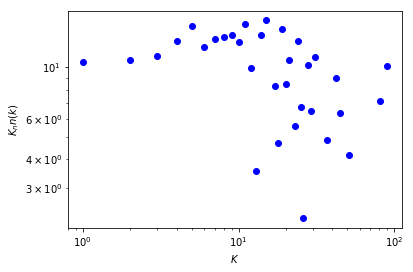

In [53]:
plt.scatter(list(gradonodlista_y2h),list(gradopromediolista_y2h))
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.show()


plt.loglog(gradonodlista_y2h,gradopromediolista_y2h,'bo')
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.show()

[ 1.18967318 -0.19755948]


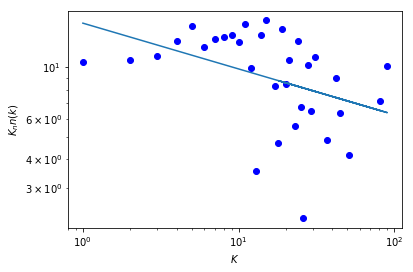

In [54]:
# Análisis de la tendencia observada para la red y2h
# ii)

powerlaw = lambda x, amp, index: amp * (x**index)

grad_y2h = np.log10(list(gradonodlista_y2h))
gradpromvecinos_y2h = np.log10(list(gradopromediolista_y2h))


fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y: (y - fitfunc(p, x)) 

pinit = [5, -2.0]
out_y2h = optimize.leastsq(errfunc, pinit,  args=(grad_y2h, gradpromvecinos_y2h), full_output=1)
pfinal_y2h = out_y2h[0]

print(pfinal_y2h)
index_y2h = pfinal_y2h[1]
amp_y2h = 10.0**pfinal_y2h[0]

plt.clf()
plt.loglog(gradonodlista_y2h,gradopromediolista_y2h,'bo') 
plt.plot(gradonodlista_y2h, powerlaw(list(gradonodlista_y2h), amp_y2h, index_y2h))     # Fit
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
#plt.ylim(1,40)                      
plt.show()

Y por último, realizamos el análisis completo para la red apms.

In [55]:
# Ejercicio 4bi
gradosporgrado=defaultdict(int)
for nod in list(graph_apms.node):
    vecinos=list(graph_apms.adj[nod])#los vecinos de nodo
    gradosveci=[]
    for vecino in vecinos:
        gradoveci=graph_apms.degree[vecino]
        gradosveci.append(gradoveci)
    gradonod=len(vecinos)  # cantidad de vecinos de nodo o grado del nodo
    if gradonod>0:
        promedionod=np.mean(gradosveci)
        if gradosporgrado[gradonod]==0:
            gradosporgrado[gradonod]=[]
            gradosporgrado[gradonod].append(promedionod)    
        else:        
            gradosporgrado[gradonod].append(promedionod)
for key in gradosporgrado.keys():
    gradosporgrado[key]=np.mean(gradosporgrado[key])


gradonodlista_apms=gradosporgrado.keys()
gradopromediolista_apms=gradosporgrado.values()

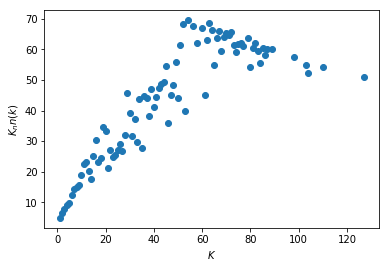

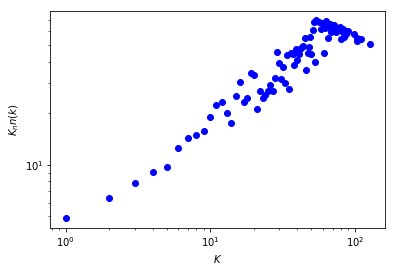

In [57]:
plt.scatter(list(gradonodlista_apms),list(gradopromediolista_apms))
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.show()

plt.loglog(gradonodlista_apms,gradopromediolista_apms,'bo')
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
plt.show()

[0.65690824 0.59928924]


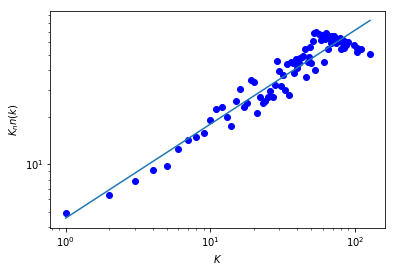

In [58]:
# Análisis de la tendencia observada para la red apms
# ii)

powerlaw = lambda x, amp, index: amp * (x**index)

grad_apms = np.log10(list(gradonodlista_apms))
gradpromvecinos_apms = np.log10(list(gradopromediolista_apms))


fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y: (y - fitfunc(p, x)) 

pinit = [5, -2.0]
out_apms = optimize.leastsq(errfunc, pinit,  args=(grad_apms, gradpromvecinos_apms), full_output=1)
pfinal_apms = out_apms[0]

print(pfinal_apms)
index_apms = pfinal_apms[1]
amp_apms = 10.0**pfinal_apms[0]

plt.clf()
plt.loglog(gradonodlista_apms,gradopromediolista_apms,'bo') 
plt.plot(gradonodlista_apms, powerlaw(list(gradonodlista_apms), amp_apms, index_apms))     # Fit
plt.ylabel("$K_nn(k)$")
plt.xlabel("$K$")
#plt.ylim(1,40)                      
plt.show()

Las dos redes representan un muestreo del mismo fenómeno. A pesar de esto, se puede observar que la primer red es disortativa, mientras que la segunda es asortativa. No sólo eso, sino que la relación para la red apms sigue en forma mucho más fiel una ley de potencias. 

Concluimos que esto se debe al método con el que se construye la red APMS. Al extraerse "bloques de proteínas" y completar la relación de todos esos bloques, los nodos con más alto grado tienen mayor posibilidad de ser parte de esos bloques, y por lo tanto de estar conectados con otros nodos de alto grado. Sin embargo esto nos habla solo de la construcción de la red, y no nos indica que la red que representa sea realmente asortativa. En cambio, utilizándo el método Y2H, que utiliza la literatura como base, se observa una red disortativa, y es menos claro que cumple una red de potencias, en especial para los nodos de mayor grado 